In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

In [2]:
!unzip '/kaggle/input/sf-crime/test.csv'
!unzip '/kaggle/input/sf-crime/train.csv'
!unzip '/kaggle/input/sf-crime/sampleSubmission.csv'

Archive:  /kaggle/input/sf-crime/test.csv.zip
  inflating: test.csv                
Archive:  /kaggle/input/sf-crime/train.csv.zip
  inflating: train.csv               
Archive:  /kaggle/input/sf-crime/sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    


In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')

In [4]:
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
submission.head(5)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [9]:
train['Dates'] = train['Dates'].astype('datetime64')
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute

train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30


In [10]:
train['X+Y'] = train['X'] + train['Y']
train['X-Y'] = train['X'] - train['Y']
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279


In [11]:
train['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x: x.days)
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [12]:
y = train['Category']

In [13]:
pd.value_counts(train['year']).sort_index()

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: year, dtype: int64

<Axes: xlabel='year'>

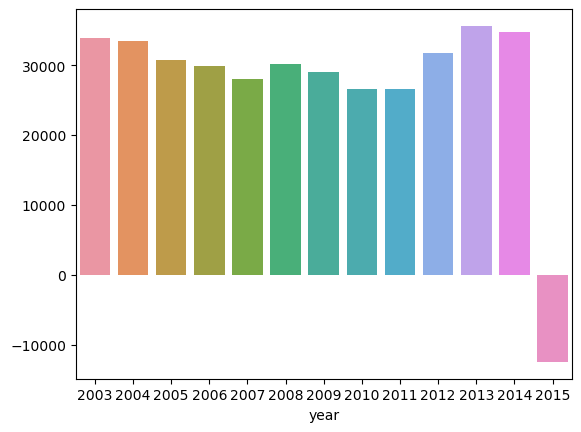

In [14]:
sns.barplot(x=train.groupby('year').size().index, y=train.groupby('year').size().values - 40000)

In [15]:
pd.value_counts(train['month']).sort_index()

1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: month, dtype: int64

<Axes: xlabel='month'>

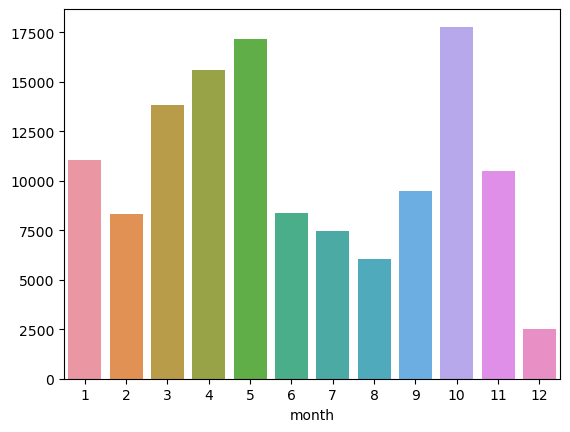

In [16]:
sns.barplot(x=train.groupby('month').size().index, y=train.groupby('month').size().values -62500)

In [17]:
pd.value_counts(train['DayOfWeek'])

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

<Axes: xlabel='dayofweek'>

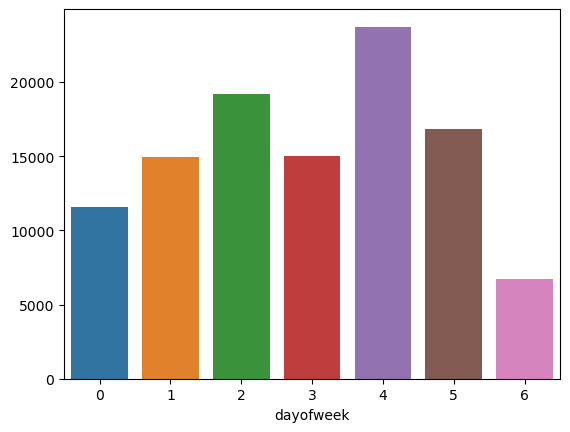

In [18]:
sns.barplot(x=train.groupby('dayofweek').size().index, y=train.groupby('dayofweek').size().values - 110000)

<Axes: xlabel='day'>

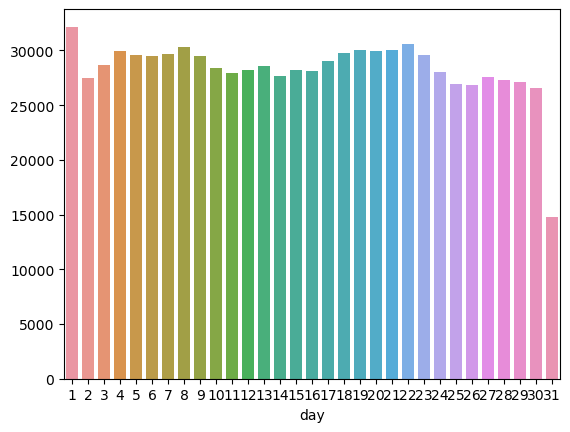

In [19]:
sns.barplot(x=train.groupby('day').size().index, y=train.groupby('day').size().values)

In [20]:
pd.value_counts(train['Category'])

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ARSON'),
  Text(1, 0, 'ASSAULT'),
  Text(2, 0, 'BAD CHECKS'),
  Text(3, 0, 'BRIBERY'),
  Text(4, 0, 'BURGLARY'),
  Text(5, 0, 'DISORDERLY CONDUCT'),
  Text(6, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(7, 0, 'DRUG/NARCOTIC'),
  Text(8, 0, 'DRUNKENNESS'),
  Text(9, 0, 'EMBEZZLEMENT'),
  Text(10, 0, 'EXTORTION'),
  Text(11, 0, 'FAMILY OFFENSES'),
  Text(12, 0, 'FORGERY/COUNTERFEITING'),
  Text(13, 0, 'FRAUD'),
  Text(14, 0, 'GAMBLING'),
  Text(15, 0, 'KIDNAPPING'),
  Text(16, 0, 'LARCENY/THEFT'),
  Text(17, 0, 'LIQUOR LAWS'),
  Text(18, 0, 'LOITERING'),
  Text(19, 0, 'MISSING PERSON'),
  Text(20, 0, 'NON-CRIMINAL'),
  Text(21, 0, 'OTHER OFFENSES'),
  Text(22, 0, 'PORNOGRAPHY/OBSCENE MAT'),
  Text(23, 0, 'PROSTITUTION'),
  Text(24, 0, 'RECOVERED VEHICLE'),
  Text(25, 0, 'ROBBERY'),
  Text(26, 0, '

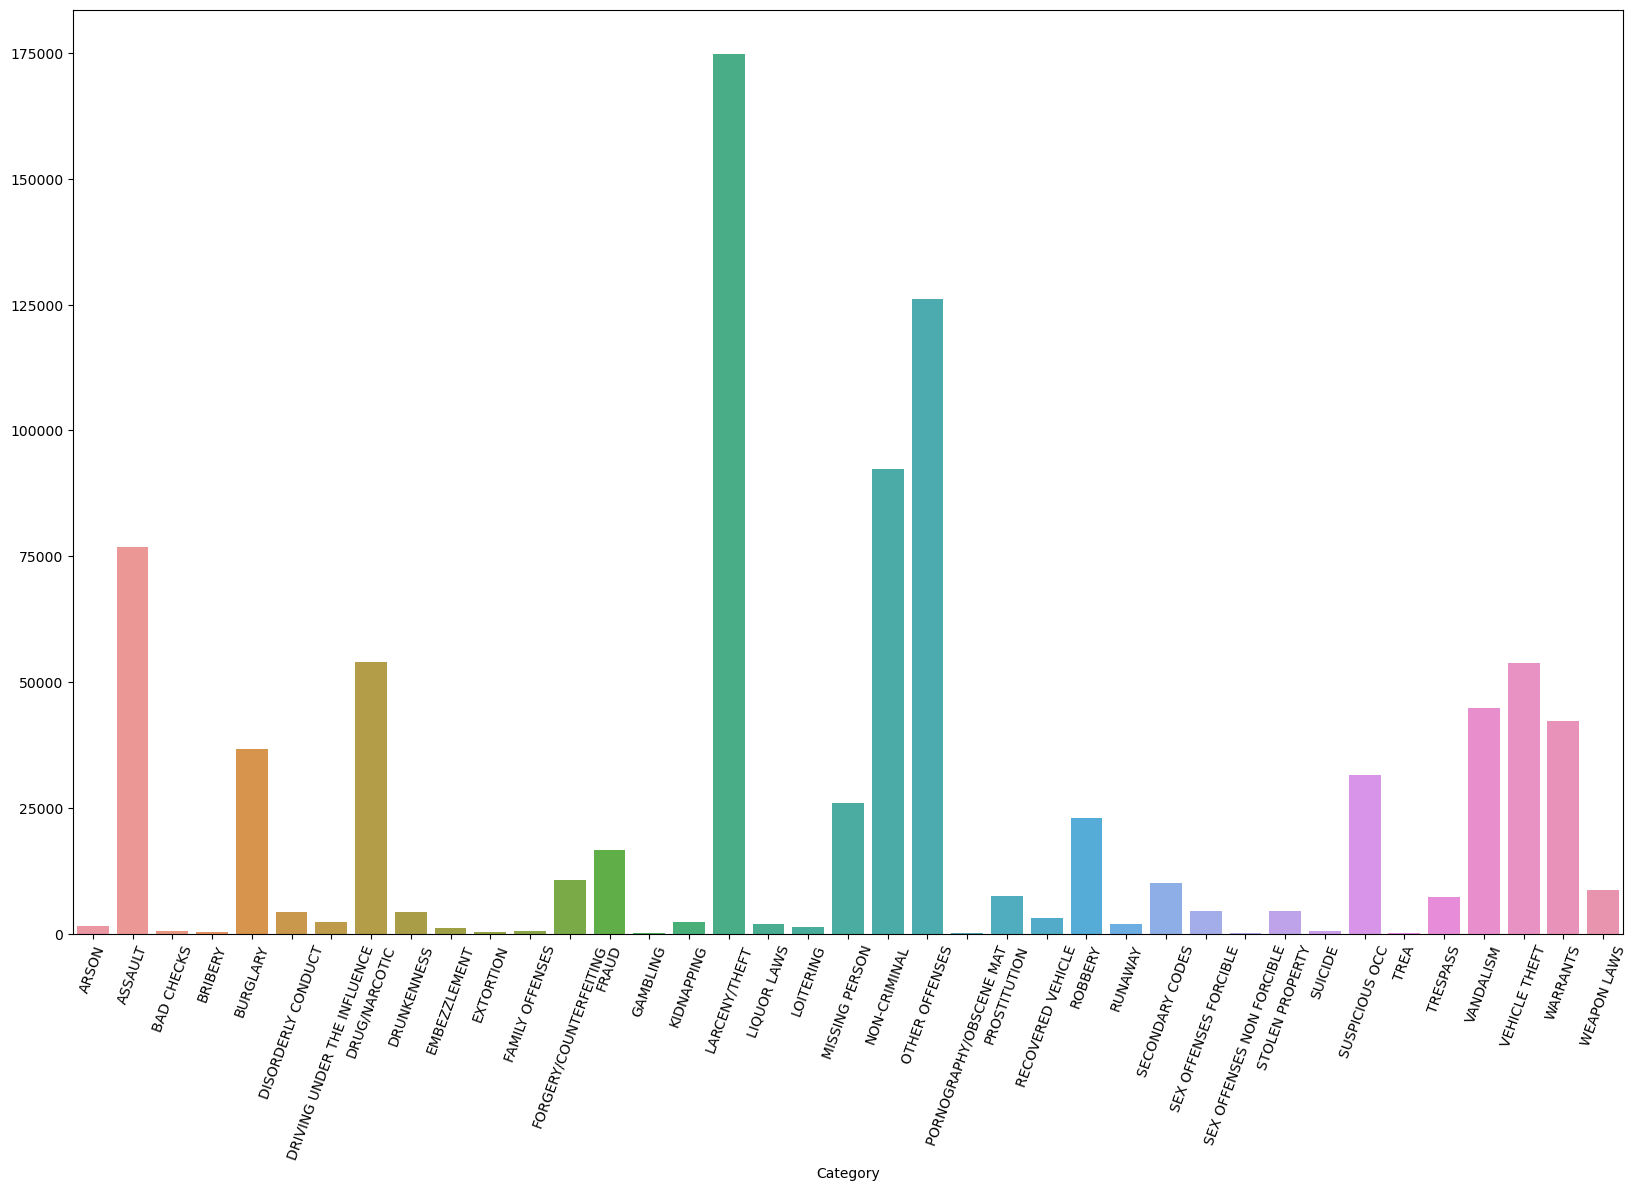

In [21]:
plt.subplots(figsize = (20,12))
sns.barplot(x=train.groupby('Category').size().index, y=train.groupby('Category').size().values)
plt.xticks(rotation=70)

In [22]:
train = train.drop(['Descript','DayOfWeek','Resolution'], axis=1)
train.head(5)

,Dates,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,2015-05-13 23:53:00,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


<Axes: xlabel='X', ylabel='Y'>

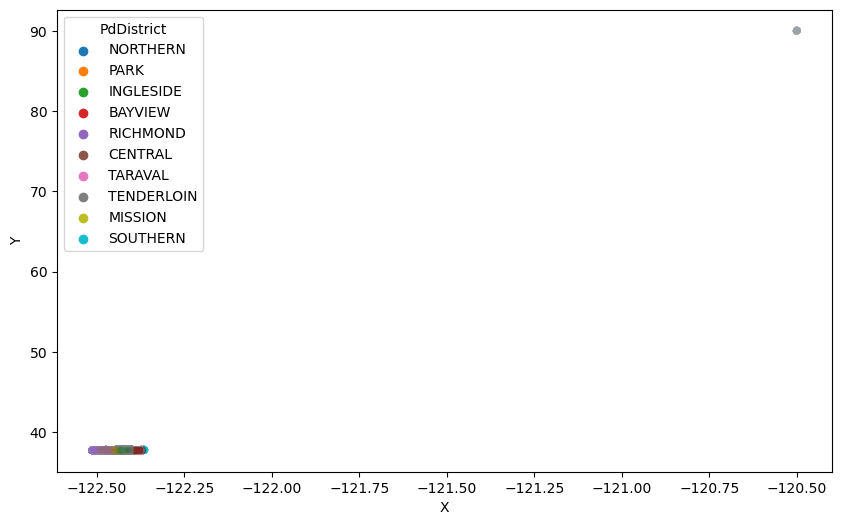

In [23]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'X', y = 'Y',
               data = train, alpha = 0.01, hue = 'PdDistrict', ax = ax)

In [24]:
train.loc[train.Y < 90].count()[0]

877982

In [25]:
train.loc[train.Y >= 90].count()[0]

67

In [26]:
train = train[train['Y'] < 90]
train.loc[train.Y < 90].count()[0]

877982

<Axes: xlabel='X', ylabel='Y'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


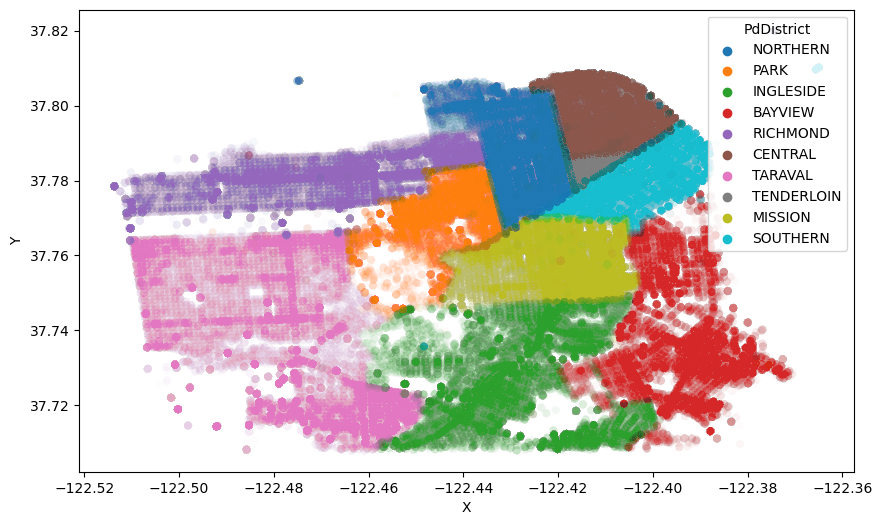

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'X', y = 'Y', data = train, alpha = 0.01, hue = 'PdDistrict', ax = ax)

In [28]:
train.head(5)

,Dates,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,2015-05-13 23:53:00,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [29]:
train.dtypes

Dates         datetime64[ns]
Category              object
PdDistrict            object
Address               object
X                    float64
Y                    float64
year                   int64
month                  int64
day                    int64
dayofweek              int64
hour                   int64
minute                 int64
X+Y                  float64
X-Y                  float64
n_days                 int64
dtype: object

In [30]:
train['Date'] = train.Dates.dt.date
daily_df = train.groupby('Date').count().iloc[:,0]
daily_df

Date
2003-01-06    400
2003-01-07    418
2003-01-08    528
2003-01-09    417
2003-01-10    399
             ... 
2015-05-02    377
2015-05-03    376
2015-05-11    425
2015-05-12    331
2015-05-13    362
Name: Dates, Length: 2249, dtype: int64

In [31]:
train.groupby('Date').count()

,Dates,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
Date,,,,,,,,,,,,,,,
2003-01-06,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400
2003-01-07,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418
2003-01-08,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528
2003-01-09,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417
2003-01-10,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-02,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377
2015-05-03,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376
2015-05-11,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425


/tmp/ipykernel_20/1989839724.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = daily_df, shade = True, ax = ax[1])


Text(0, 0.5, 'Density')

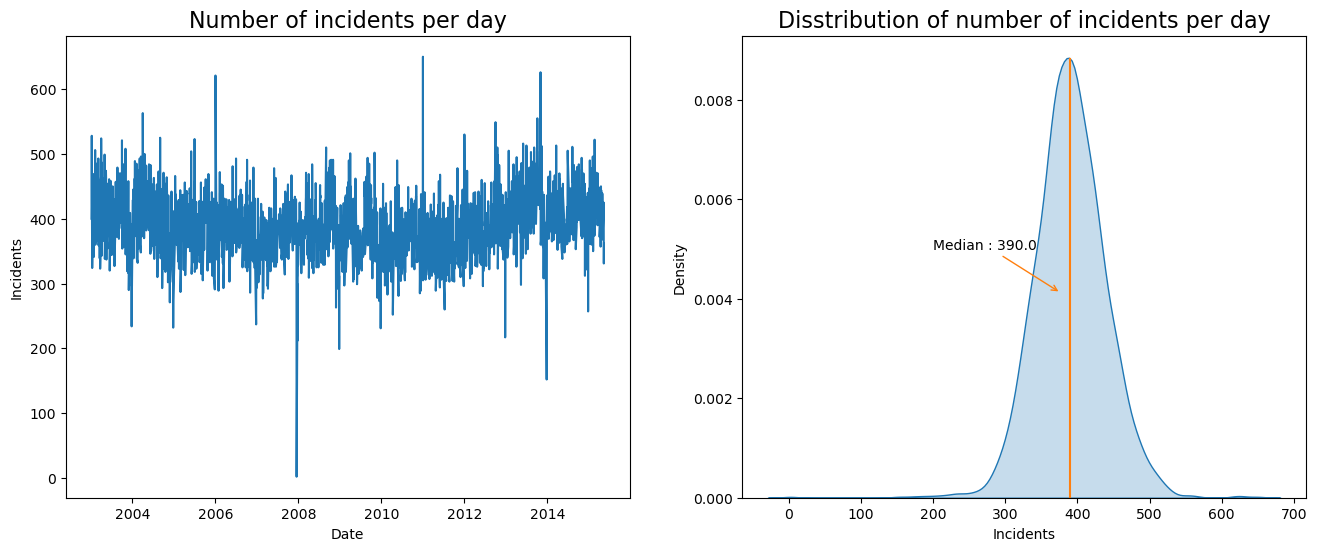

In [32]:
col = sns.color_palette()
#
fig, ax = plt.subplots(ncols = 2, figsize = (16, 6))
#
sns.lineplot(x = daily_df.index, y = daily_df.values, ax = ax[0])
#
ax[0].set_title('Number of incidents per day', fontdict = {'fontsize' : 16})
ax[0].set_ylabel('Incidents')
#
sns.kdeplot(data = daily_df, shade = True, ax = ax[1])
ax[1].axvline(x = daily_df.median(), ymax = 0.95, linestyle = '-', color = col[1])
ax[1].annotate('Median : '+str(daily_df.median()), xy = (daily_df.median(), 0.004), xytext = (200, 0.005), arrowprops = dict(arrowstyle = '->', color = col[1], shrinkB = 10))
ax[1].set_title('Disstribution of number of incidents per day', fontdict = {'fontsize' : 16})
ax[1].set_xlabel('Incidents')
ax[1].set_ylabel('Density')

The minimum Incident hour :
 hour
5    8637
Name: Dates, dtype: int64
The maximum Incident hour :
 hour
18    55095
Name: Dates, dtype: int64


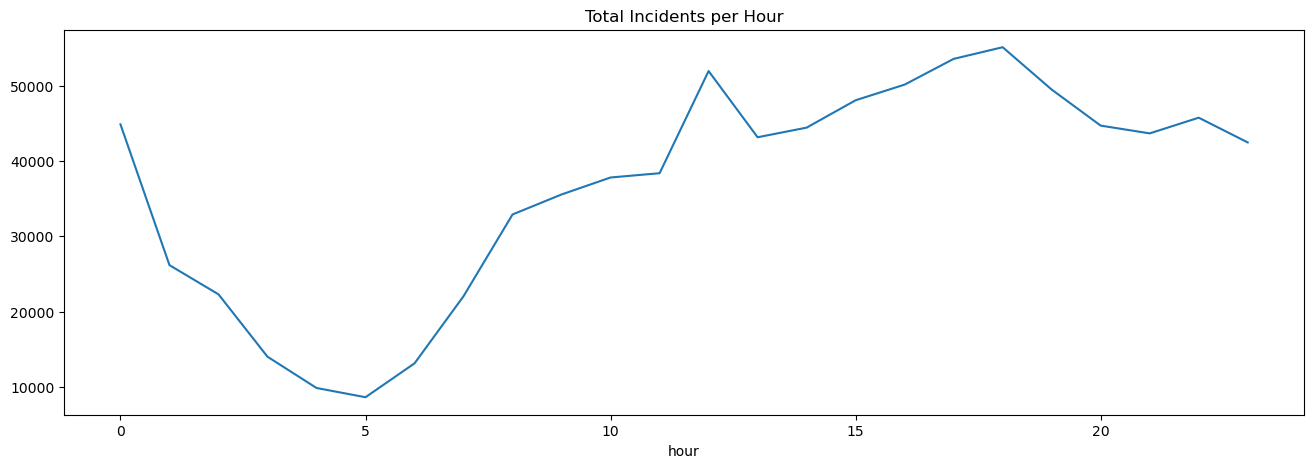

In [33]:
hour_df = train.groupby('hour').count().iloc[:, 0]
print('The minimum Incident hour :\n', hour_df[hour_df.values == min(hour_df.values)])
print('The maximum Incident hour :\n', hour_df[hour_df.values == max(hour_df.values)])

fig, ax = plt.subplots(figsize = (16, 5))
ax = sns.lineplot(x = hour_df.index, y = hour_df.values)
plt.title('Total Incidents per Hour')
plt.show()

In [34]:
test.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [35]:
train = train.drop(['Dates','Date'], axis=1)
train.head(5)

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [36]:
#피쳐 엔지니어링 : 데이터로 모델을 트레이닝시키는 데 사용되는 머신 러닝 알고리즘의 성능을 향상하기 위해 데이터를 변환하고 개선하는 프로세스
def feature_engineering(data):
    data.drop_duplicates(inplace = True)
    data['Dates'] = data['Dates'].astype('datetime64')
    data['year'] = data['Dates'].dt.year
    data['month'] = data['Dates'].dt.month
    data['day'] = data['Dates'].dt.day
    data['dayofweek'] = data['Dates'].dt.dayofweek
    data['hour'] = data['Dates'].dt.hour
    data['minute'] = data['Dates'].dt.minute
    data['X+Y'] = data['X'] + data['Y']
    data['X-Y'] = data['X'] - data['Y']
    data['n_days'] = (data['Dates'].dt.date - data['Dates'].dt.date.min()).apply(lambda x: x.days)
    data.drop(columns = ['Id', 'Dates','DayOfWeek', 'Address'], inplace = True)
    return data
test = feature_engineering(test)

In [37]:
test.head(5)

,PdDistrict,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,BAYVIEW,-122.399588,37.735051,2015,5,10,6,23,59,-84.664537,-160.134639,4512
1,BAYVIEW,-122.391523,37.732432,2015,5,10,6,23,51,-84.659091,-160.123955,4512
2,NORTHERN,-122.426002,37.792212,2015,5,10,6,23,50,-84.633790,-160.218214,4512
3,INGLESIDE,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512
4,INGLESIDE,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512


In [38]:
train = train.drop(['Address'], axis=1)
train.head(5)

,Category,PdDistrict,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [39]:
#PdDistrict 처리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [40]:
le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.fit_transform(test['PdDistrict'])

In [41]:
train.head(5)

,Category,PdDistrict,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,4,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,4,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,4,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,4,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,5,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [42]:
test.head(5)

,PdDistrict,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,0,-122.399588,37.735051,2015,5,10,6,23,59,-84.664537,-160.134639,4512
1,0,-122.391523,37.732432,2015,5,10,6,23,51,-84.659091,-160.123955,4512
2,4,-122.426002,37.792212,2015,5,10,6,23,50,-84.633790,-160.218214,4512
3,2,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512
4,2,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512


In [43]:
le2 = LabelEncoder()
train['Category'] = le2.fit_transform(train['Category'])

In [44]:
X = train[['PdDistrict', 'X', 'Y', 'year', 'day', 'month', 'dayofweek', 'hour', 'minute', 'X+Y', 'X-Y', 'n_days']]
y = train['Category']

In [45]:
X.head(5)

,PdDistrict,X,Y,year,day,month,dayofweek,hour,minute,X+Y,X-Y,n_days
0,4,-122.425892,37.774599,2015,13,5,2,23,53,-84.651293,-160.200490,4510
1,4,-122.425892,37.774599,2015,13,5,2,23,53,-84.651293,-160.200490,4510
2,4,-122.424363,37.800414,2015,13,5,2,23,33,-84.623949,-160.224777,4510
3,4,-122.426995,37.800873,2015,13,5,2,23,30,-84.626123,-160.227868,4510
4,5,-122.438738,37.771541,2015,13,5,2,23,30,-84.667196,-160.210279,4510


In [46]:
y.head(5)

0    37
1    21
2    21
3    16
4    16
Name: Category, dtype: int64

In [47]:
submission.head(5)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
import lightgbm as lgb

In [49]:
train_set = lgb.Dataset(X, label = y, categorical_feature = ['PdDistrict'], free_raw_data = False)

params = {'objective' : 'multiclass',
         'num_class' : 39}

lgbm_b0 = lgb.train(params, train_set, num_boost_round = 6)
preds = lgbm_b0.predict(test)
preds

/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 877982, number of used features: 12
[LightGBM] [Info] Start training from score -6.363532
[LightGBM] [Info] Start training from score -2.435484
[LightGBM] [Info] Start training from score -7.679028
[LightGBM] [Info] Start training from score -8.018955
[LightGBM] [Info] Start training from score -3.173379
[LightGBM] [Info] Start training from score -5.314834
[LightGBM] [Info] Start training from score -5.958728
[LightGBM] [Info] Start training from score -2.789179
[LightGBM] [Info] Start training from score -5.323673
[LightGBM] [Info] Start training from score -6.624047
[LightGBM] [Info] Start training from score -8.140204
[LightGBM] [Info] Start training from score -7.48

array([[2.42372643e-03, 1.05075813e-01, 3.45577826e-04, ...,
        4.27389224e-02, 5.98915136e-02, 1.39086545e-02],
       [2.23781925e-03, 1.01880875e-01, 3.19070957e-04, ...,
        3.94607172e-02, 6.63399677e-02, 1.51363048e-02],
       [1.38576830e-03, 9.18822669e-02, 3.51821809e-04, ...,
        4.14769140e-02, 4.39650610e-02, 9.03531141e-03],
       ...,
       [7.47341810e-06, 8.24855466e-02, 5.83699845e-04, ...,
        8.67638718e-02, 2.86425136e-02, 9.12499380e-03],
       [3.01927835e-03, 9.07664353e-02, 1.74259563e-02, ...,
        6.94006757e-02, 2.81234544e-02, 1.13812339e-02],
       [1.19324815e-03, 6.22560170e-02, 5.30348726e-04, ...,
        7.88335123e-02, 2.60245410e-02, 6.19924148e-03]])